In [141]:
import pandas as pd
import numpy as np

qc_stats = pd.read_csv('../Results/Reports/multiqc_report_data/mqc_picard_deduplication_1.txt',
                      sep="\t", header=0, index_col=0)

mutations_filtered = pd.read_csv('../analysis/merged_variants_anno_vaf_filtered.txt', 
                                 sep="\t", header=0, index_col=0, low_memory=False)

mutations = pd.read_csv('../analysis/merged_variants_anno_vaf.txt',
                        sep="\t", header=0, index_col=0, low_memory=False)


metasamples = pd.read_excel('../Metadata4.xlsx')

In [142]:
print(len(set(metasamples['PATIENT_ID'])))
print(len(set(metasamples['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

48
150
88
68
36
15
31


In [143]:
metasamples = metasamples[~metasamples['PATIENT_ID'].isin(['VHIO_XX1', 'VHIO_XX2', 
                                                          'VHIO_XX3', 'VHIO_XX4', 
                                                          'VHIO_XX5', 'VHIO_XX6'])]
SAMPLES = [x.strip() for x in metasamples['SAMPLE_ID'] + '-' + metasamples['PATIENT_ID']]
metasamples.index = SAMPLES

In [144]:
print(len(set(metasamples['PATIENT_ID'])))
print(len(set(metasamples['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['TUMOR_ONLY'] == 'No']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'gDNA']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(metasamples[metasamples['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

42
144
88
67
33
15
29


<ipython-input-145-fc8f3905e6b5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


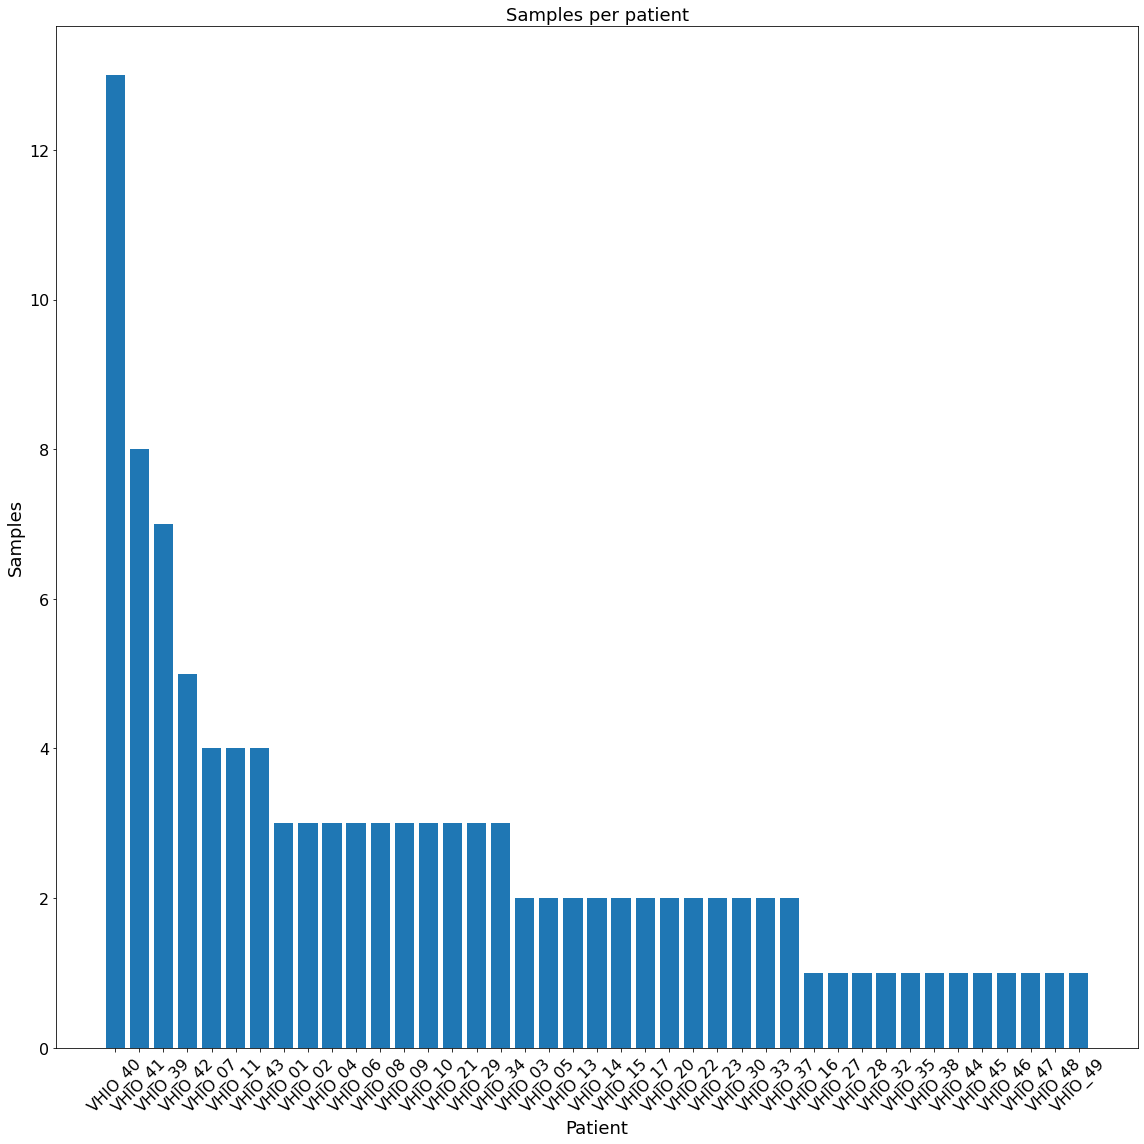

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sub = metasamples.loc[(metasamples['SAMPLE_TYPE'] != "gDNA"), 
                      ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('samples_per_patient_all.png')

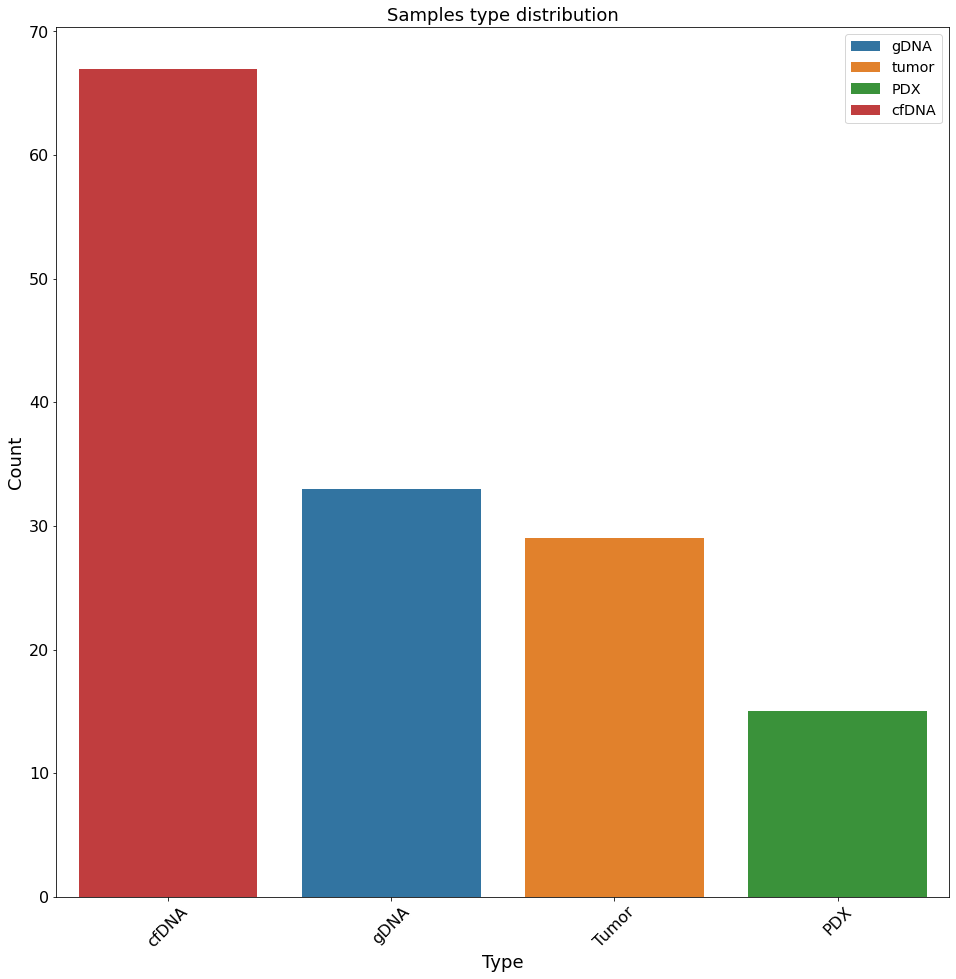

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='SAMPLE_TYPE', hue='SAMPLE_TYPE', dodge=False,
                       data=metasamples, hue_order=['gDNA', 'tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'gDNA', 'Tumor', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_all.png')

In [147]:
# Keep only samples that are tumor-normal pair and labeled as included
meta_filtered = metasamples.loc[(metasamples['INCLUDED'] == "Y")
                                & (metasamples['TUMOR_ONLY'] == "No")
                                & (metasamples['SAMPLE_TYPE'] != "gDNA"), :]
SAMPLES = meta_filtered.index.tolist()

mutations_filtered = mutations_filtered.loc[:, mutations_filtered.columns[0:10].to_list() + SAMPLES]
mutations = mutations.loc[:, mutations.columns[0:10].to_list() + SAMPLES]

qc_stats = qc_stats.loc[df['SAMPLE_ID'], :]
qc_stats['SAMPLE_ID'] = qc_stats.index
qc_stats.index = SAMPLES
qc_stats['type'] = meta_filtered['SAMPLE_TYPE'].to_numpy()
qc_stats['Unique Pairs'] = qc_stats['Unique Pairs'] / 1000000
qc_stats['VAR2'] = meta_filtered['VAR2'].to_numpy()
qc_stats['PATIENT_ID'] = meta_filtered['PATIENT_ID'].to_numpy()

In [148]:
print(len(set(meta_filtered['PATIENT_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'cfDNA']['SAMPLE_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'PDX']['SAMPLE_ID'])))
print(len(set(meta_filtered[meta_filtered['SAMPLE_TYPE'] == 'tumor']['SAMPLE_ID'])))

19
16
4
15


In [149]:
print(len(set(meta_filtered[meta_filtered['VAR2'] == 'E']['PATIENT_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'cfDNA')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'PDX')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'E') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'tumor')]['SAMPLE_ID'])))

13
6
4
9


In [150]:
print(len(set(meta_filtered[meta_filtered['VAR2'] == 'F']['PATIENT_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'cfDNA')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'PDX')]['SAMPLE_ID'])))
print(len(set(meta_filtered[(meta_filtered['VAR2'] == 'F') 
                            & (meta_filtered['SAMPLE_TYPE'] == 'tumor')]['SAMPLE_ID'])))

10
10
0
6


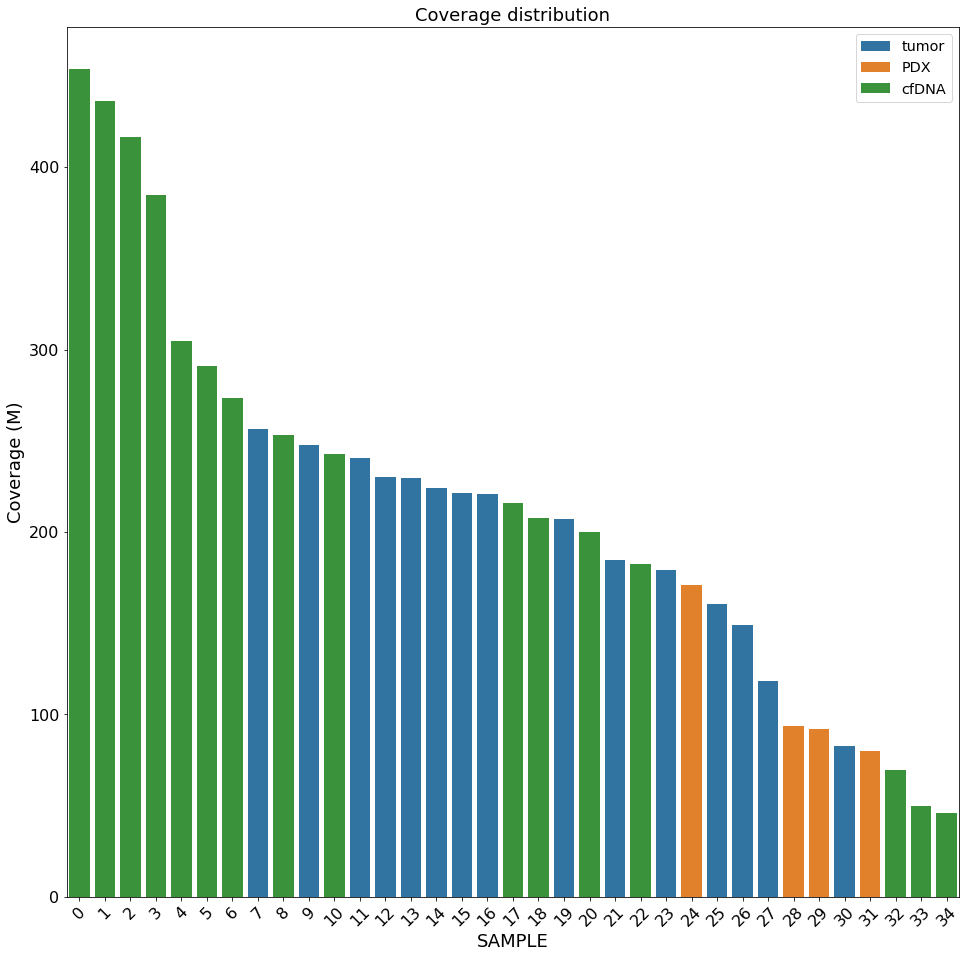

In [151]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats, hue_order=['tumor', 'PDX', 'cfDNA'], 
                       order=qc_stats.sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution.png')

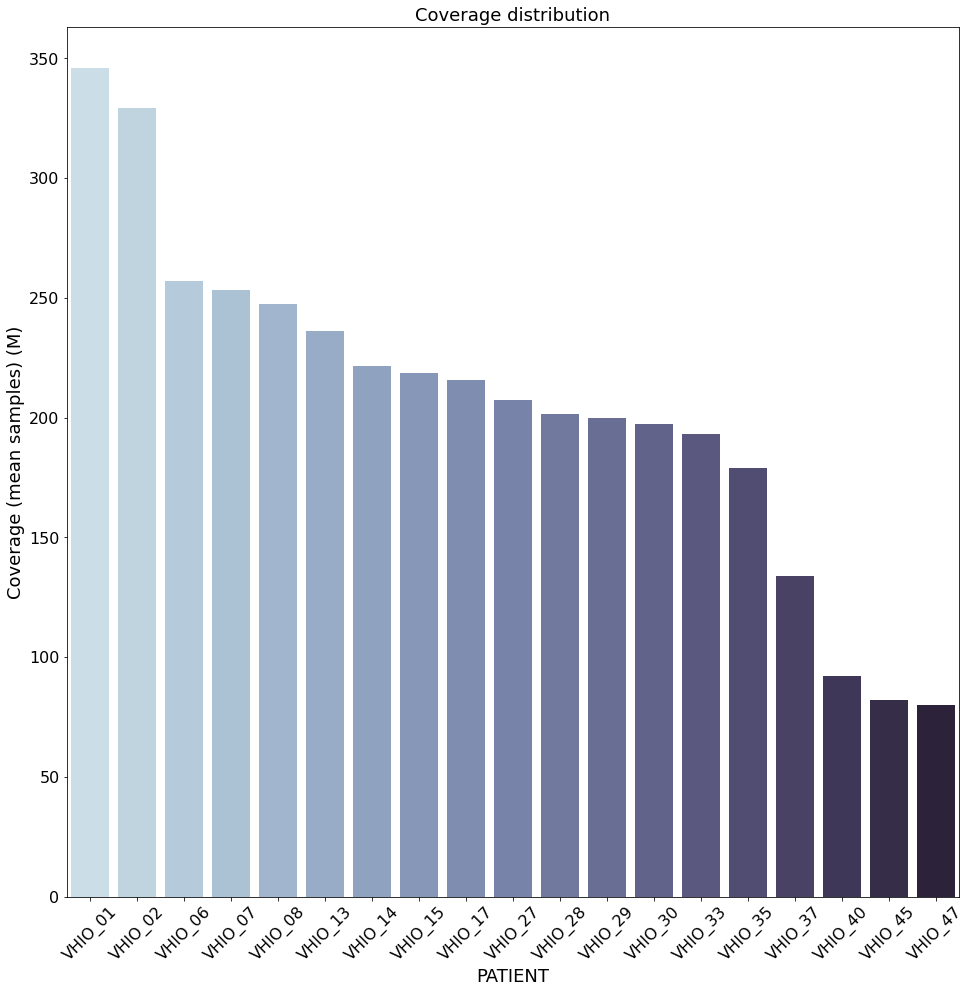

In [152]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=tmp.sort_values('Unique Pairs', ascending = False).index, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(tmp.index, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
fig.savefig('coverage_distribution_per_patient.png')

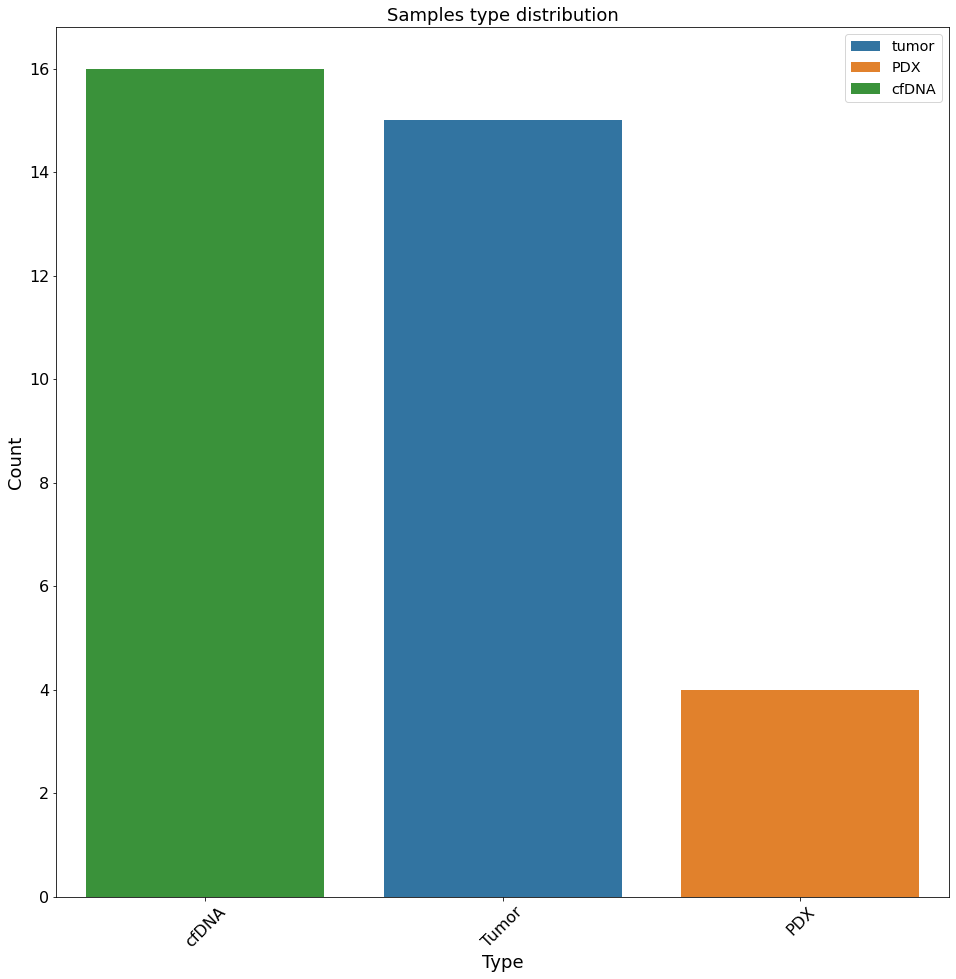

In [153]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                       data=qc_stats, hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution.png')

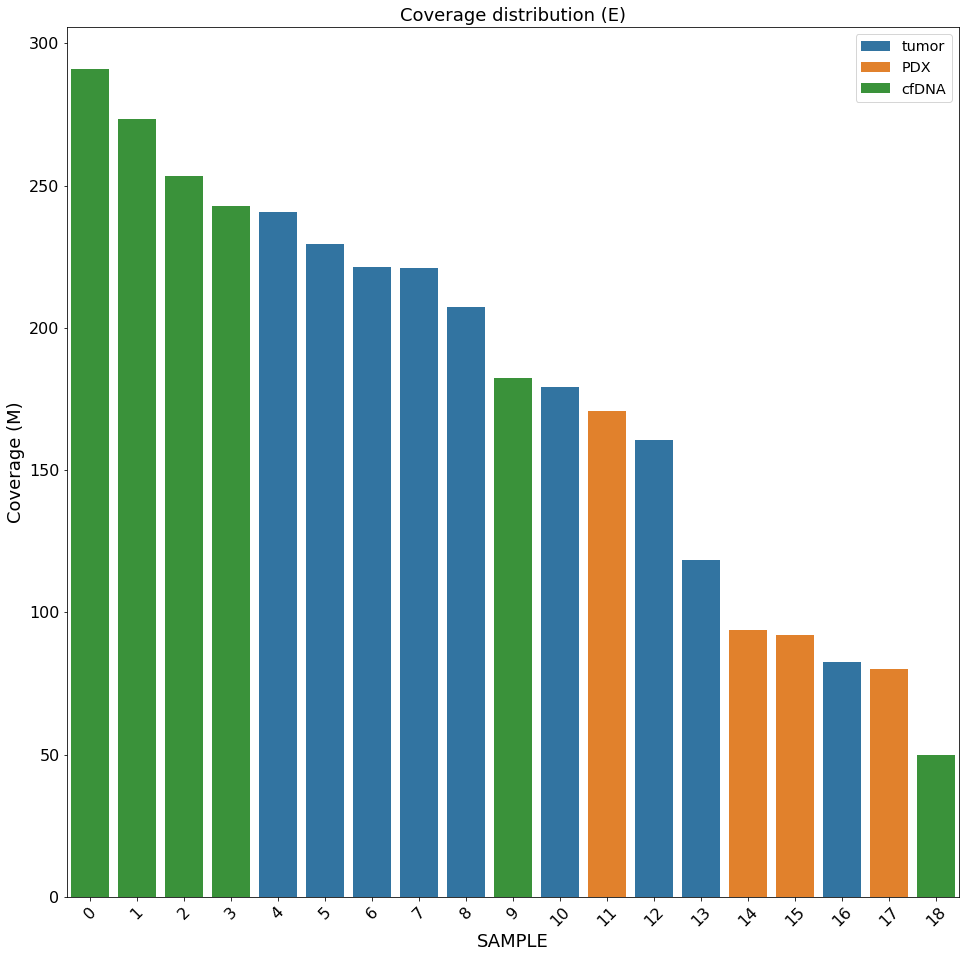

In [154]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats[qc_stats['VAR2'] == 'E'], 
                       hue_order=['tumor', 'PDX', 'cfDNA'],
                       order=qc_stats[qc_stats['VAR2'] == 'E'].sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_E.png')

No handles with labels found to put in legend.


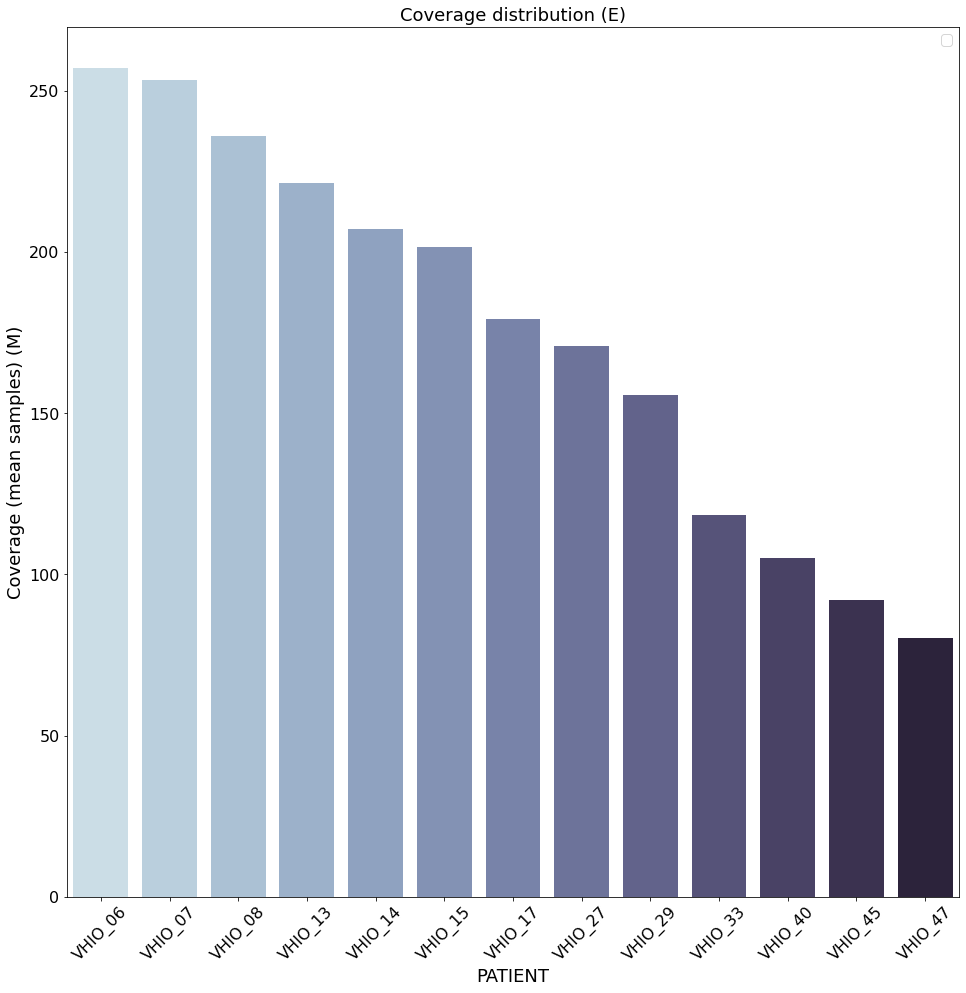

In [155]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats[qc_stats['VAR2'] == 'E']
tmp = tmp.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=tmp.sort_values('Unique Pairs', ascending = False).index, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(tmp.index, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_per_patient_E.png')

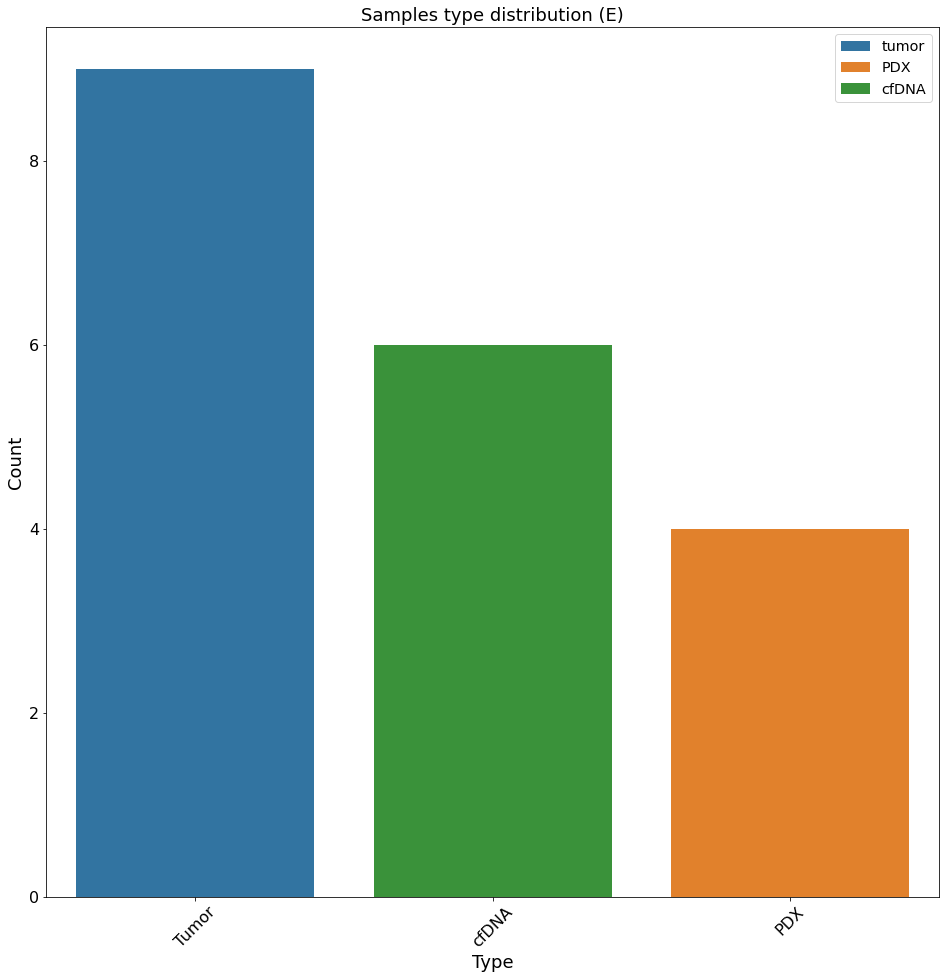

In [156]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                         data=qc_stats[qc_stats['VAR2'] == 'E'], 
                         hue_order=['tumor', 'PDX', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['Tumor', 'cfDNA', 'PDX'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (E)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_E.png')

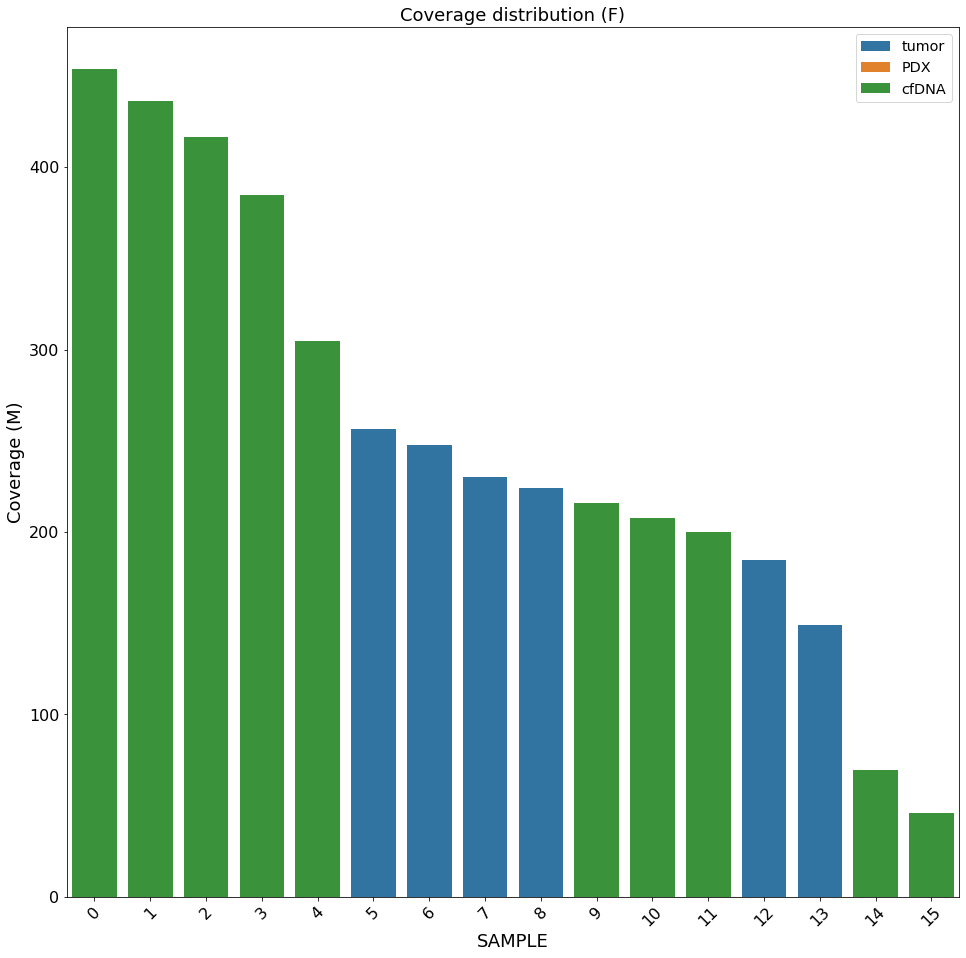

In [157]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.barplot(x='SAMPLE_ID', y='Unique Pairs', hue="type", dodge=False,
                       data=qc_stats[qc_stats['VAR2'] == 'F'], 
                       hue_order=['tumor', 'PDX', 'cfDNA'],
                       order=qc_stats[qc_stats['VAR2'] == 'F'].sort_values('Unique Pairs', ascending = False).SAMPLE_ID, 
                       ax=ax)
_ = sns_plot.set_xticklabels(sns_plot.get_xticks(), size=16, rotation=45)
_ = sns_plot.set_xlabel('SAMPLE', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('coverage_distribution_F.png')

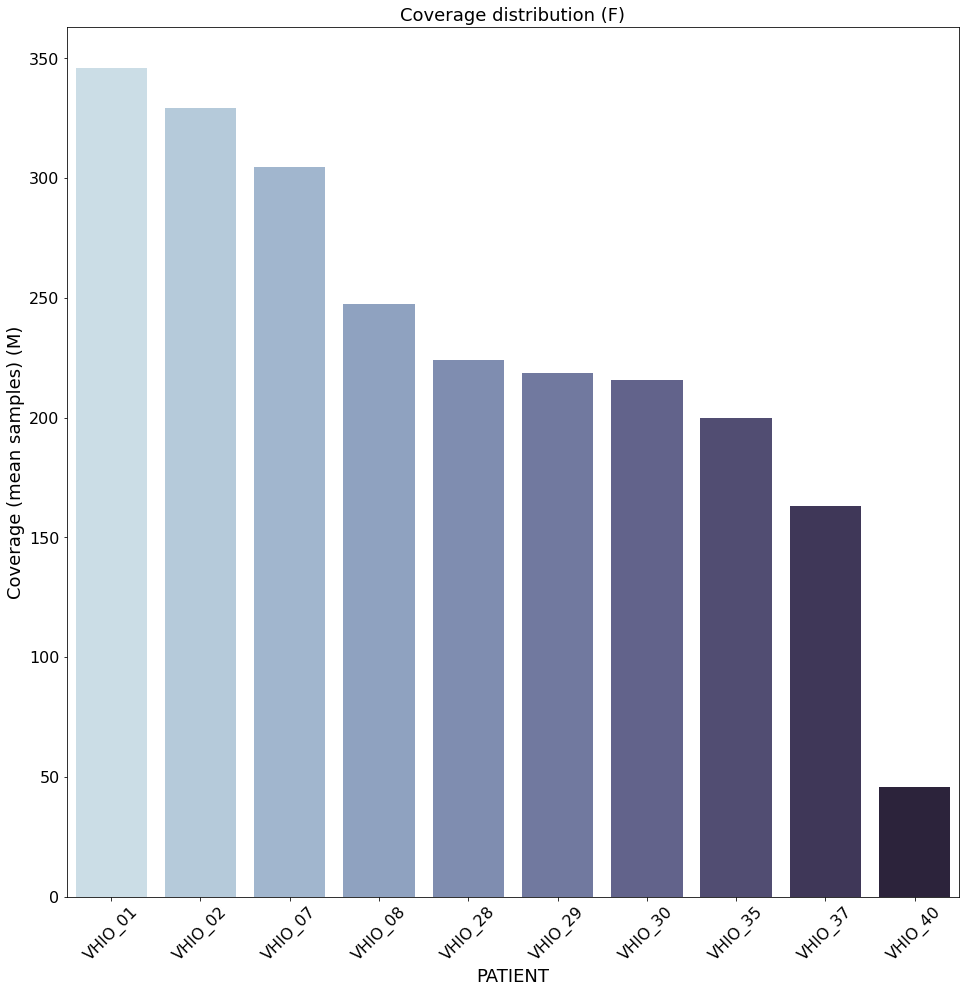

In [158]:
fig, ax = plt.subplots(figsize=(16,16))

tmp = qc_stats[qc_stats['VAR2'] == 'F']
tmp = tmp.groupby('PATIENT_ID').mean()
tmp['PATIENT_ID'] = tmp.index

sns_plot = sns.barplot(x='PATIENT_ID', y='Unique Pairs', dodge=False, data=tmp, 
                       order=tmp.sort_values('Unique Pairs', ascending = False).index, 
                       ax=ax, palette='ch:s=.25,rot=-.25')
_ = sns_plot.set_xticklabels(tmp.index, size=16, rotation=45)
_ = sns_plot.set_xlabel('PATIENT', fontsize=18)
_ = sns_plot.set_ylabel('Coverage (mean samples) (M)', fontsize=18)
_ = sns_plot.set_title('Coverage distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
fig.savefig('coverage_distribution_per_patient_F.png')

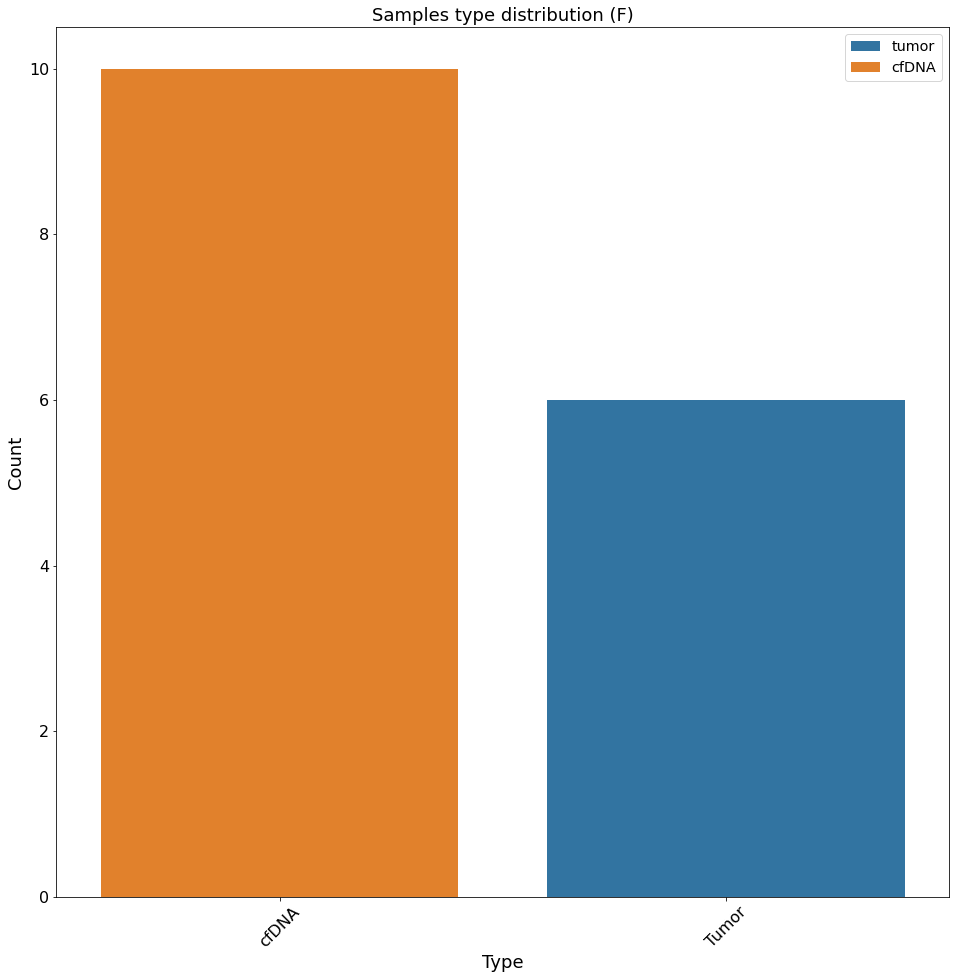

In [159]:
fig, ax = plt.subplots(figsize=(16,16))

sns_plot = sns.countplot(x='type', hue='type', dodge=False,
                         data=qc_stats[qc_stats['VAR2'] == 'F'], 
                         hue_order=['tumor', 'cfDNA'], ax=ax)
_ = sns_plot.set_xticklabels(['cfDNA', 'Tumor'], size=16, rotation=45)
_ = sns_plot.set_xlabel('Type', fontsize=18)
_ = sns_plot.set_ylabel('Count', fontsize=18)
_ = sns_plot.set_title('Samples type distribution (F)', fontsize=18)
_ = sns_plot.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='20')
fig.savefig('samples_type_distribution_F.png')

<ipython-input-160-de03445f9f6c>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


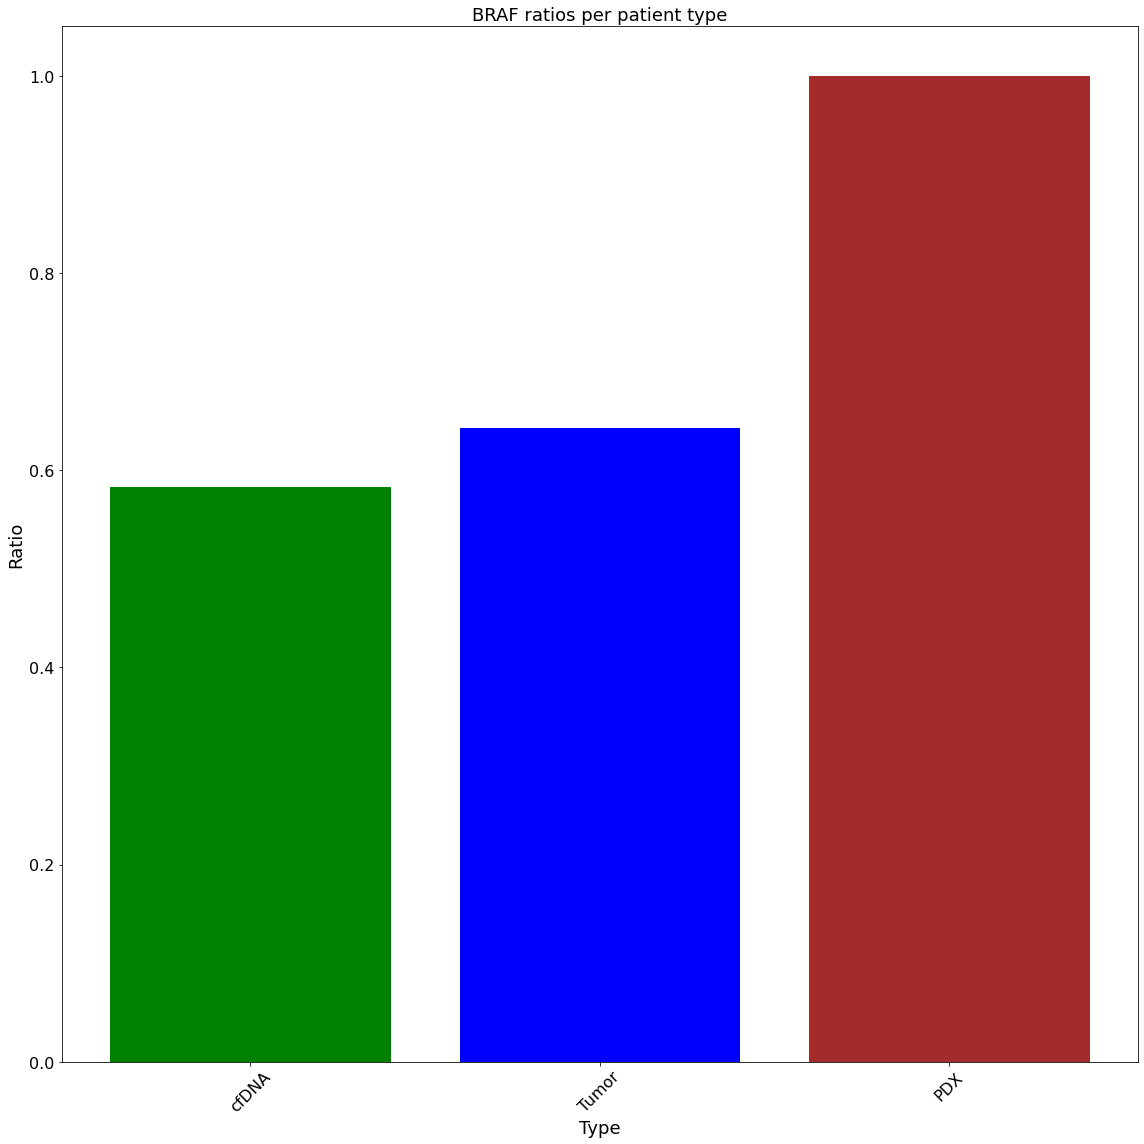

In [160]:
total_pdx = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'PDX'), 'PATIENT_ID']))
total_cfdna = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'cfDNA'), 'PATIENT_ID']))
total_tumor = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'tumor'), 'PATIENT_ID']))

ratios_braf = list()

mut_braf = mutations[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if row['AACHANGE'] == 'p.Val600Glu':
        braf_mutations_cfDNA = set()
        braf_mutations_tumor = set()
        braf_mutations_PDX = set()
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = meta_filtered.loc[c, 'SAMPLE_TYPE']
                patient = c.split('-')[-1]
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA.add(patient)
                elif 'tumor' in sample_type:
                    braf_mutations_tumor.add(patient)
                elif 'PDX' in sample_type:
                    braf_mutations_PDX.add(patient)
                else:
                    print(c)
        ratios_braf.append((len(braf_mutations_cfDNA) / total_cfdna,
                            len(braf_mutations_tumor) / total_tumor,
                            len(braf_mutations_PDX) / total_pdx))
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per patient type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('braf_ratios_patients.png')

<ipython-input-161-322c09e28402>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


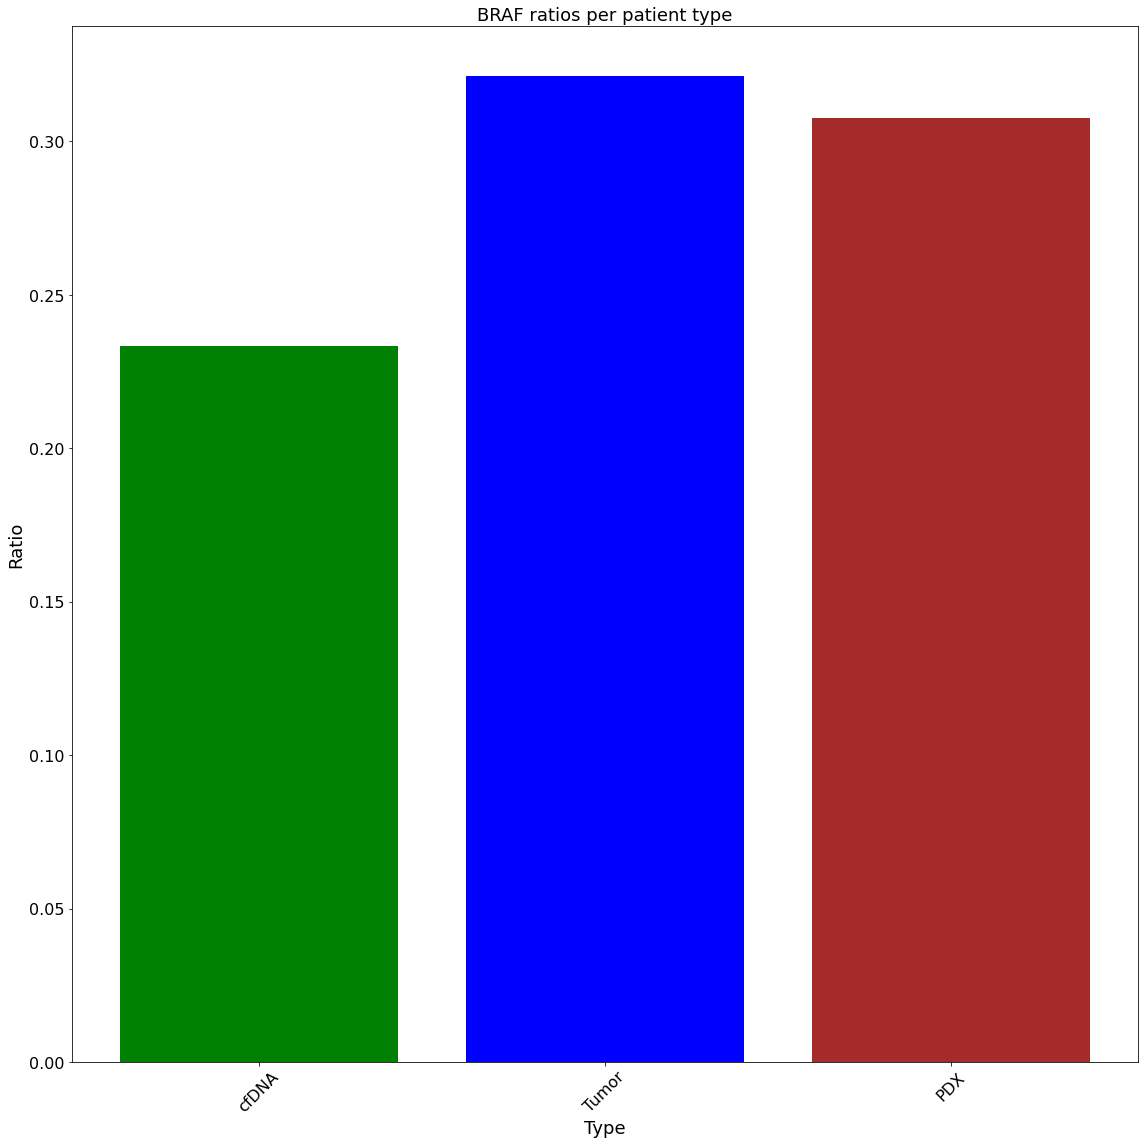

In [161]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX'), 'PATIENT_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'PATIENT_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'PATIENT_ID']))

ratios_braf = list()

mut_braf = mutations[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if row['AACHANGE'] == 'p.Val600Glu':
        braf_mutations_cfDNA = set()
        braf_mutations_tumor = set()
        braf_mutations_PDX = set()
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                patient = c.split('-')[-1]
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA.add(patient)
                elif 'tumor' in sample_type:
                    braf_mutations_tumor.add(patient)
                elif 'PDX' in sample_type:
                    braf_mutations_PDX.add(patient)
                else:
                    print(c)
        ratios_braf.append((len(braf_mutations_cfDNA) / total_cfdna,
                            len(braf_mutations_tumor) / total_tumor,
                            len(braf_mutations_PDX) / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per patient type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('braf_ratios_patients_unfiltered.png')


<ipython-input-162-f3600b364d06>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


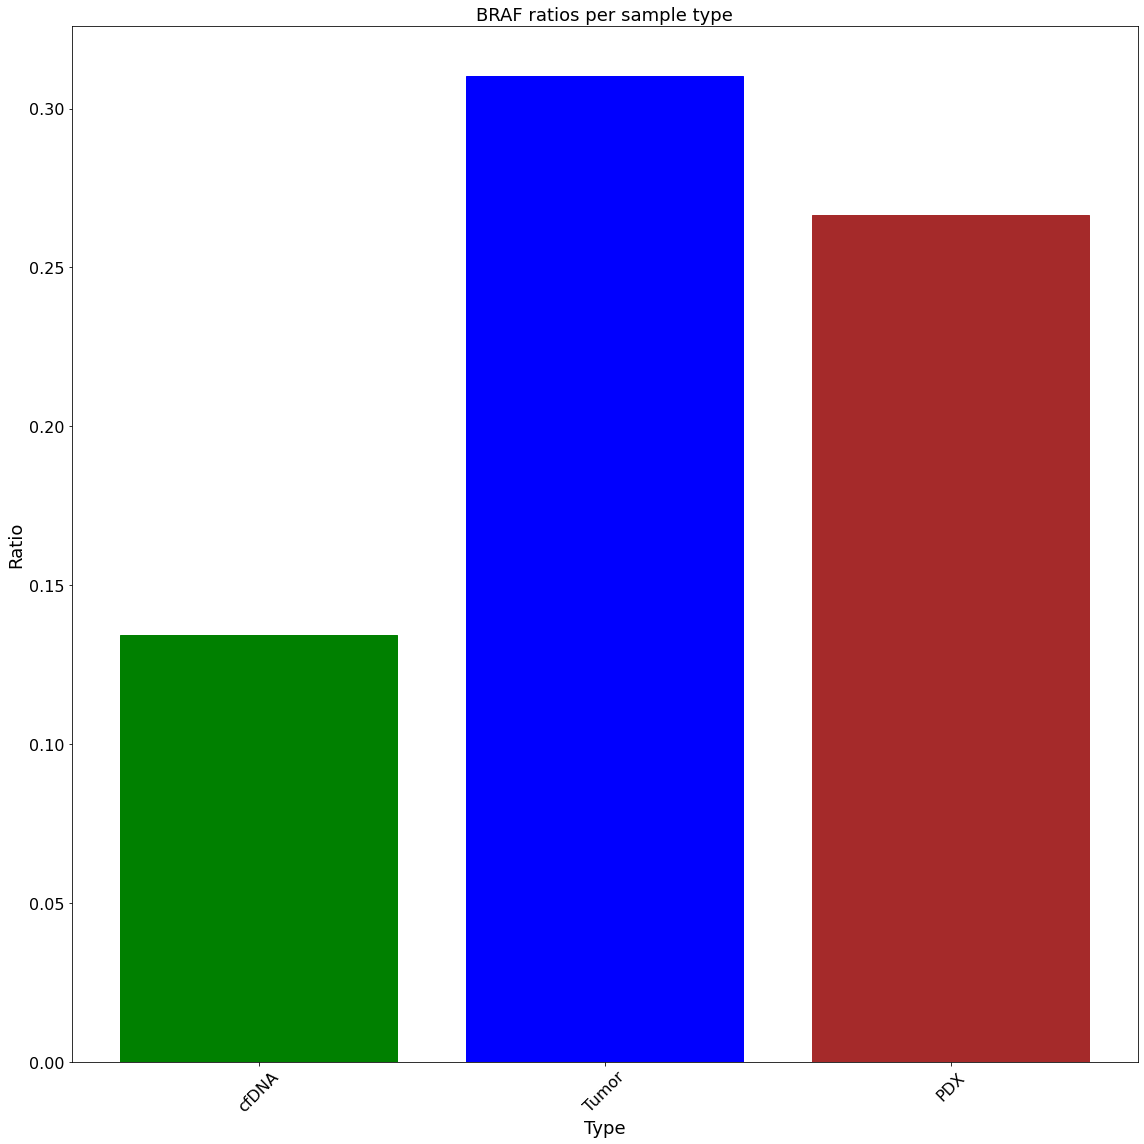

In [162]:
total_pdx = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'PDX'), 'SAMPLE_ID']))
total_cfdna = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'cfDNA'), 'SAMPLE_ID']))
total_tumor = len(set(metasamples.loc[(metasamples['SAMPLE_TYPE'] == 'tumor'), 'SAMPLE_ID']))

ratios_braf = list()

mut_braf = mutations[mutations['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if row['AACHANGE'] == 'p.Val600Glu':
        braf_mutations_cfDNA = 0
        braf_mutations_tumor = 0
        braf_mutations_PDX = 0
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = metasamples.loc[c, 'SAMPLE_TYPE']
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA += 1
                elif 'tumor' in sample_type:
                    braf_mutations_tumor += 1
                elif 'PDX' in sample_type:
                    braf_mutations_PDX += 1
                else:
                    print(c)      
        ratios_braf.append((braf_mutations_cfDNA / total_cfdna,
                            braf_mutations_tumor / total_tumor,
                            braf_mutations_PDX / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per sample type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('braf_ratios_unfiltered.png')

<ipython-input-163-bd76da54617b>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)


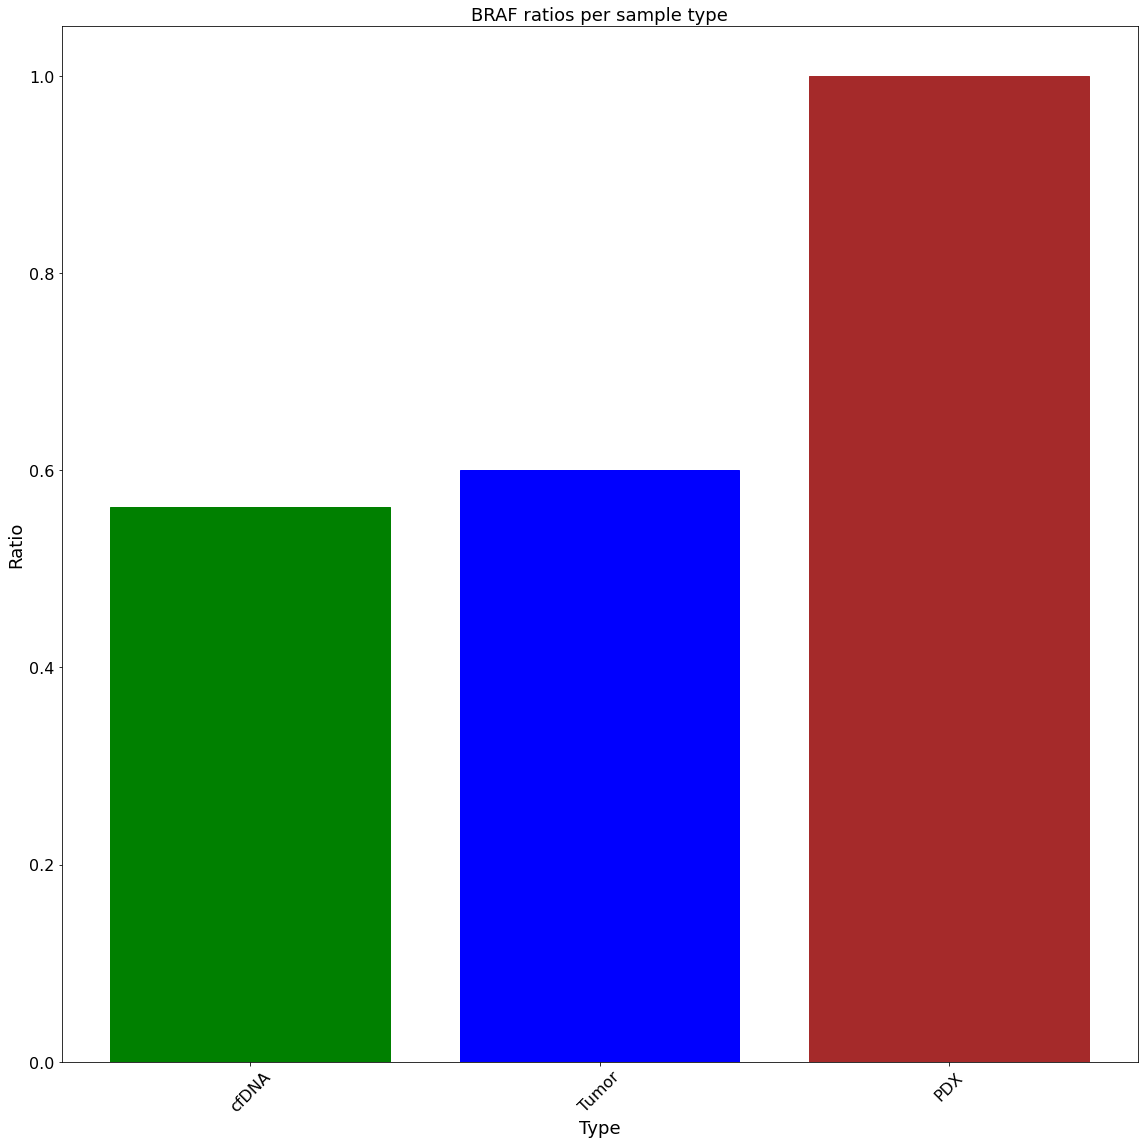

In [163]:
total_pdx = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'PDX'), 'SAMPLE_ID']))
total_cfdna = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'cfDNA'), 'SAMPLE_ID']))
total_tumor = len(set(meta_filtered.loc[(meta_filtered['SAMPLE_TYPE'] == 'tumor'), 'SAMPLE_ID']))

ratios_braf = list()

mut_braf = mutations_filtered[mutations_filtered['GENE'] == 'BRAF']
for index,row in mut_braf.iterrows():
    if row['AACHANGE'] == 'p.Val600Glu':
        braf_mutations_cfDNA = 0
        braf_mutations_tumor = 0
        braf_mutations_PDX = 0
        for c,v in row[10:].items():
            if float(v) == 0:
                continue
            else:
                sample_type = meta_filtered.loc[c, 'SAMPLE_TYPE']
                if 'cfDNA' in sample_type:
                    braf_mutations_cfDNA += 1
                elif 'tumor' in sample_type:
                    braf_mutations_tumor += 1
                elif 'PDX' in sample_type:
                    braf_mutations_PDX += 1
                else:
                    print(c)
                    
        ratios_braf.append((braf_mutations_cfDNA / total_cfdna,
                            braf_mutations_tumor / total_tumor,
                            braf_mutations_PDX / total_pdx))
        
        
fig, ax = plt.subplots(figsize=(16,16))
barlist = ax.bar(['cfDNA', 'Tumor', 'PDX'], ratios_braf[0])
barlist[0].set_color('green')
barlist[1].set_color('blue')
barlist[2].set_color('brown')
ax.set_xticklabels(['cfDNA', 'Tumor', 'PDX'], fontsize=16, rotation=45)
ax.set_xlabel('Type', fontsize=18)
ax.set_ylabel('Ratio', fontsize=18)
ax.set_title('BRAF ratios per sample type', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('braf_ratios.png')

<ipython-input-164-6231c89806f4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


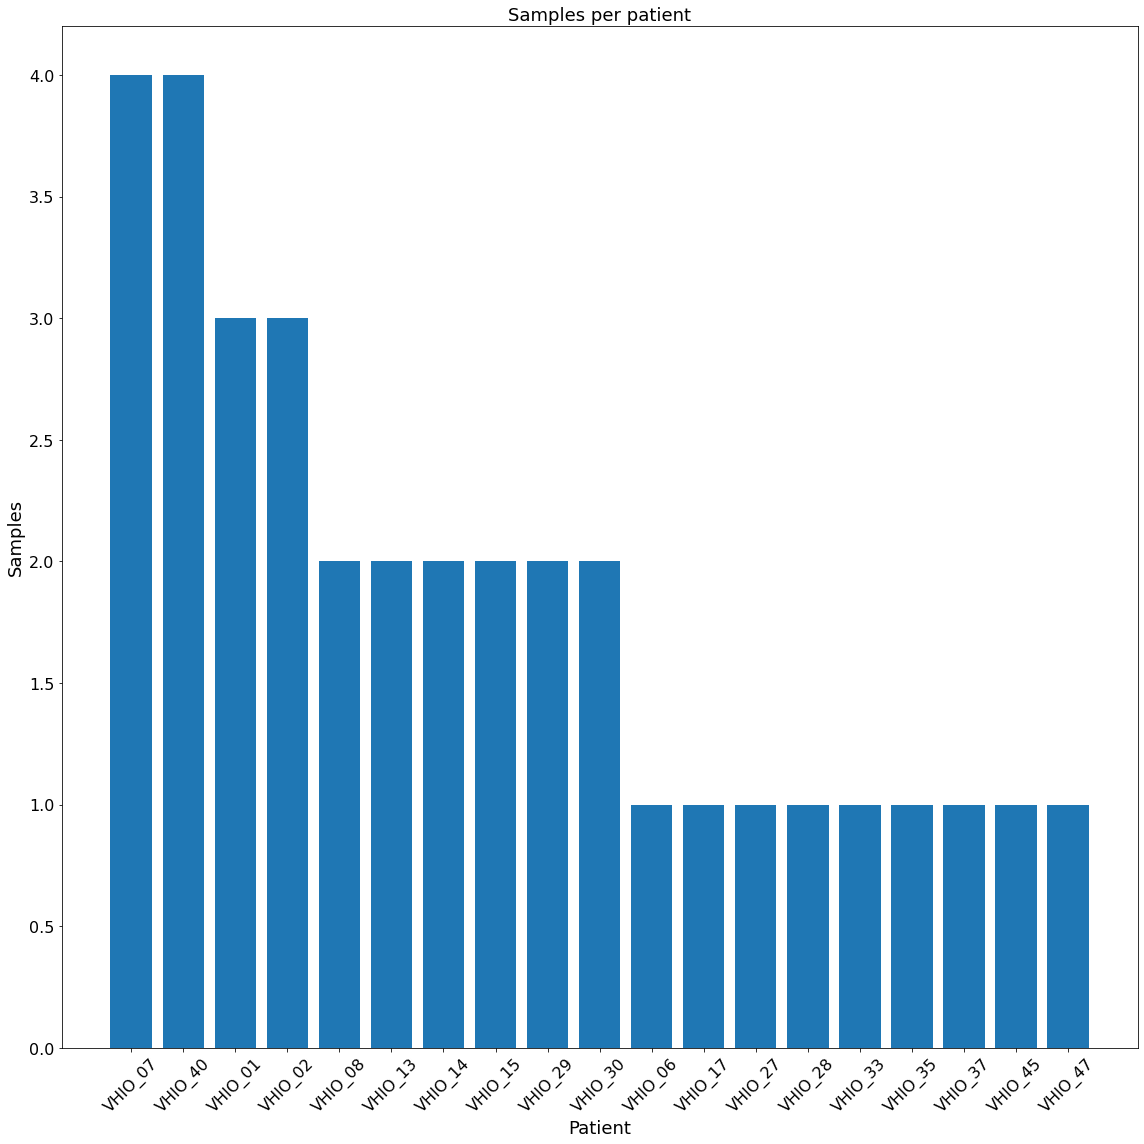

In [164]:
sub = meta_filtered.loc[:, ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('samples_per_patient.png')


<ipython-input-165-5e2540a73e62>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


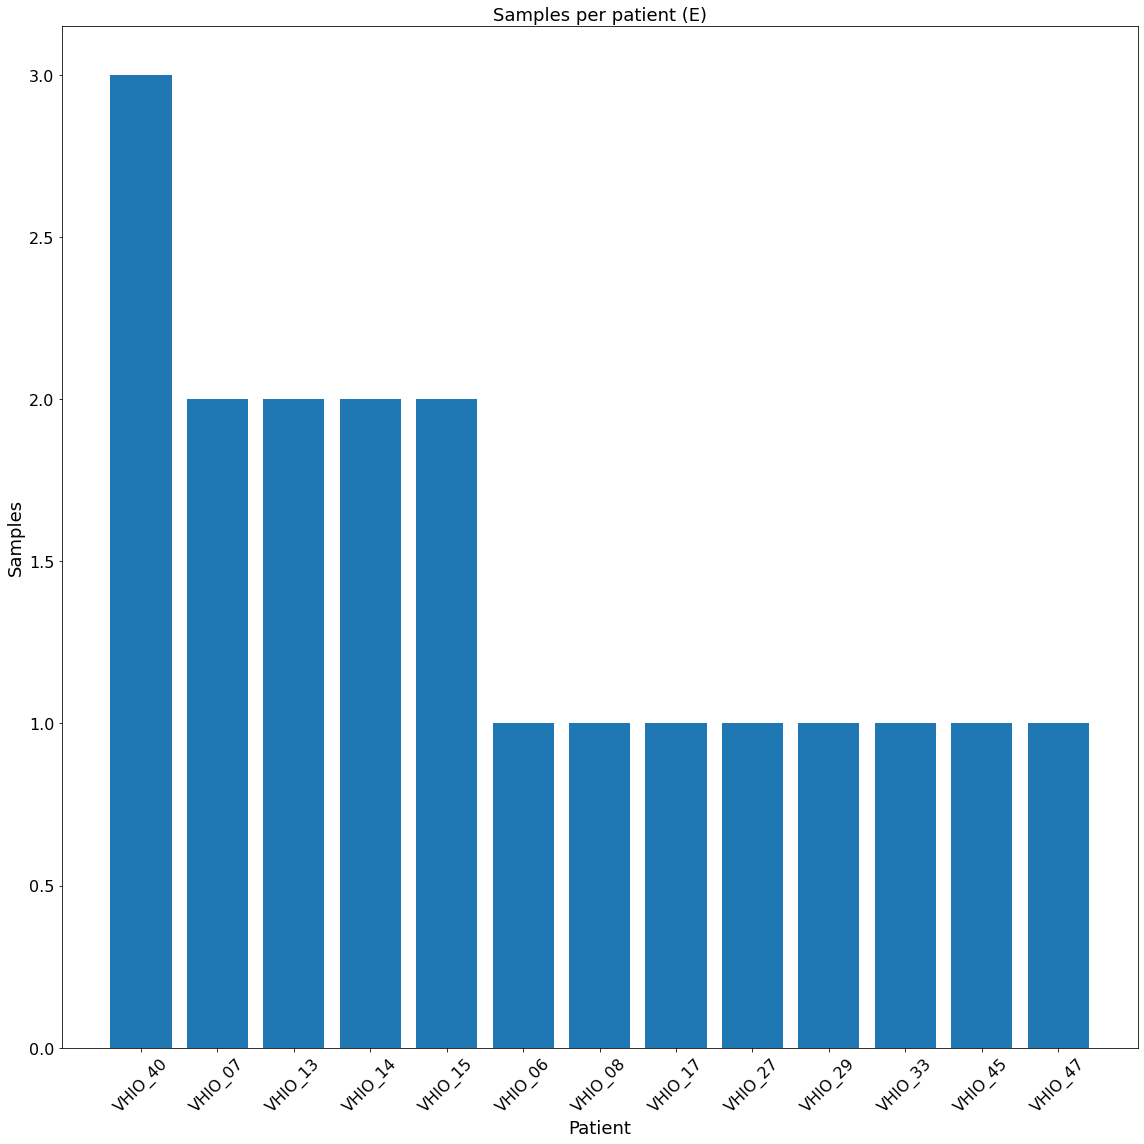

In [165]:
sub = meta_filtered.loc[meta_filtered['VAR2'] == 'E', ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('samples_per_patient_E.png')

<ipython-input-166-e02873c3c47b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


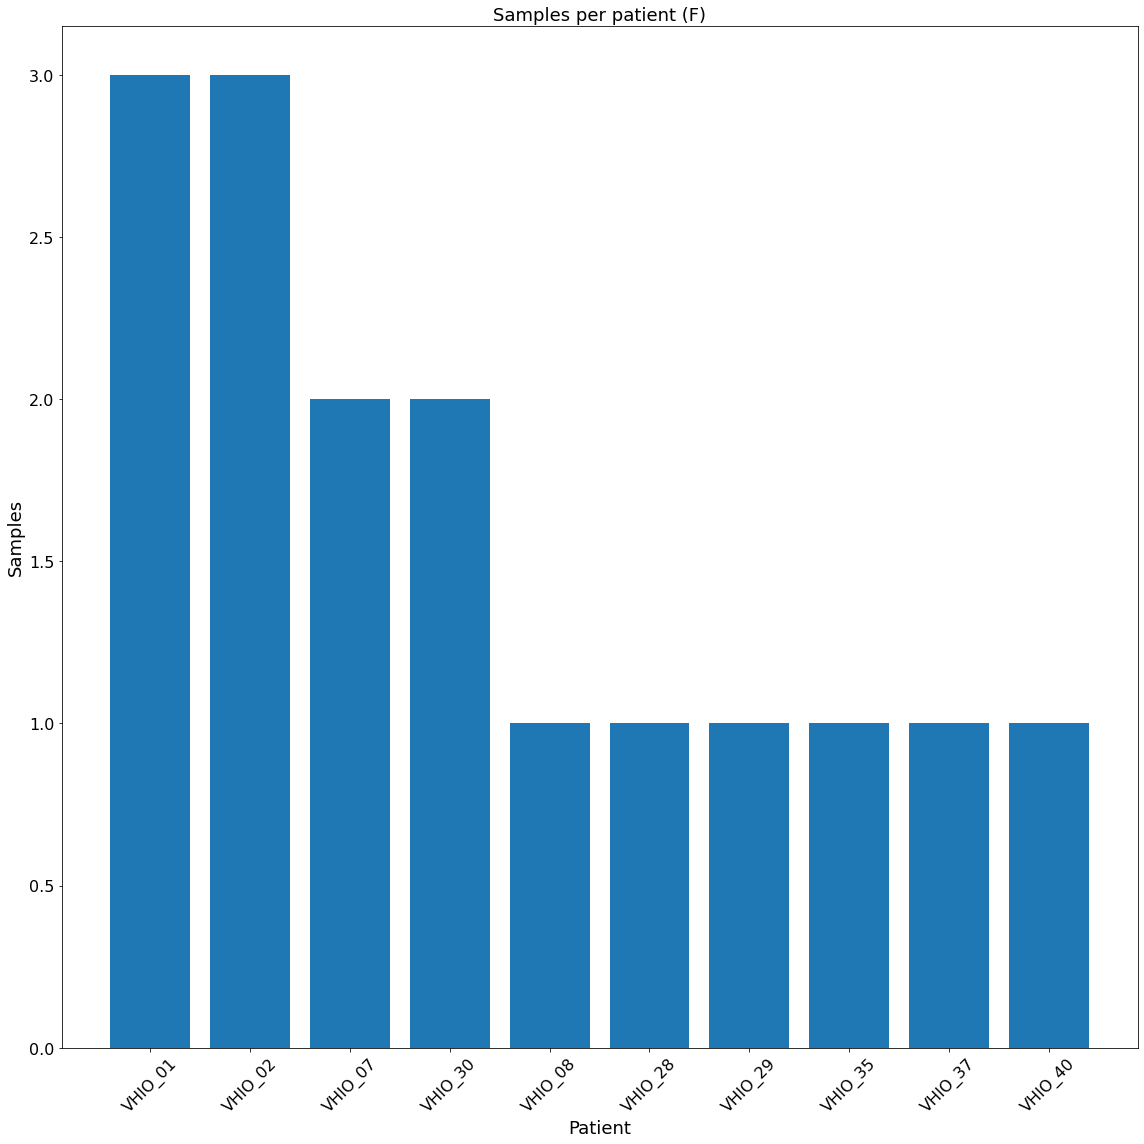

In [166]:
sub = meta_filtered.loc[meta_filtered['VAR2'] == 'F', ['PATIENT_ID', 'SAMPLE_ID']].groupby(['PATIENT_ID']).count()
patients_samples = [(x,y) for x,y in zip(sub.index ,sub['SAMPLE_ID'])]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

fig, ax = plt.subplots(figsize=(16,16))

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)
ax.set_title('Samples per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('samples_per_patient_F.png')

<ipython-input-167-31d07d9bf51b>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-167-31d07d9bf51b>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-167-31d07d9bf51b>:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


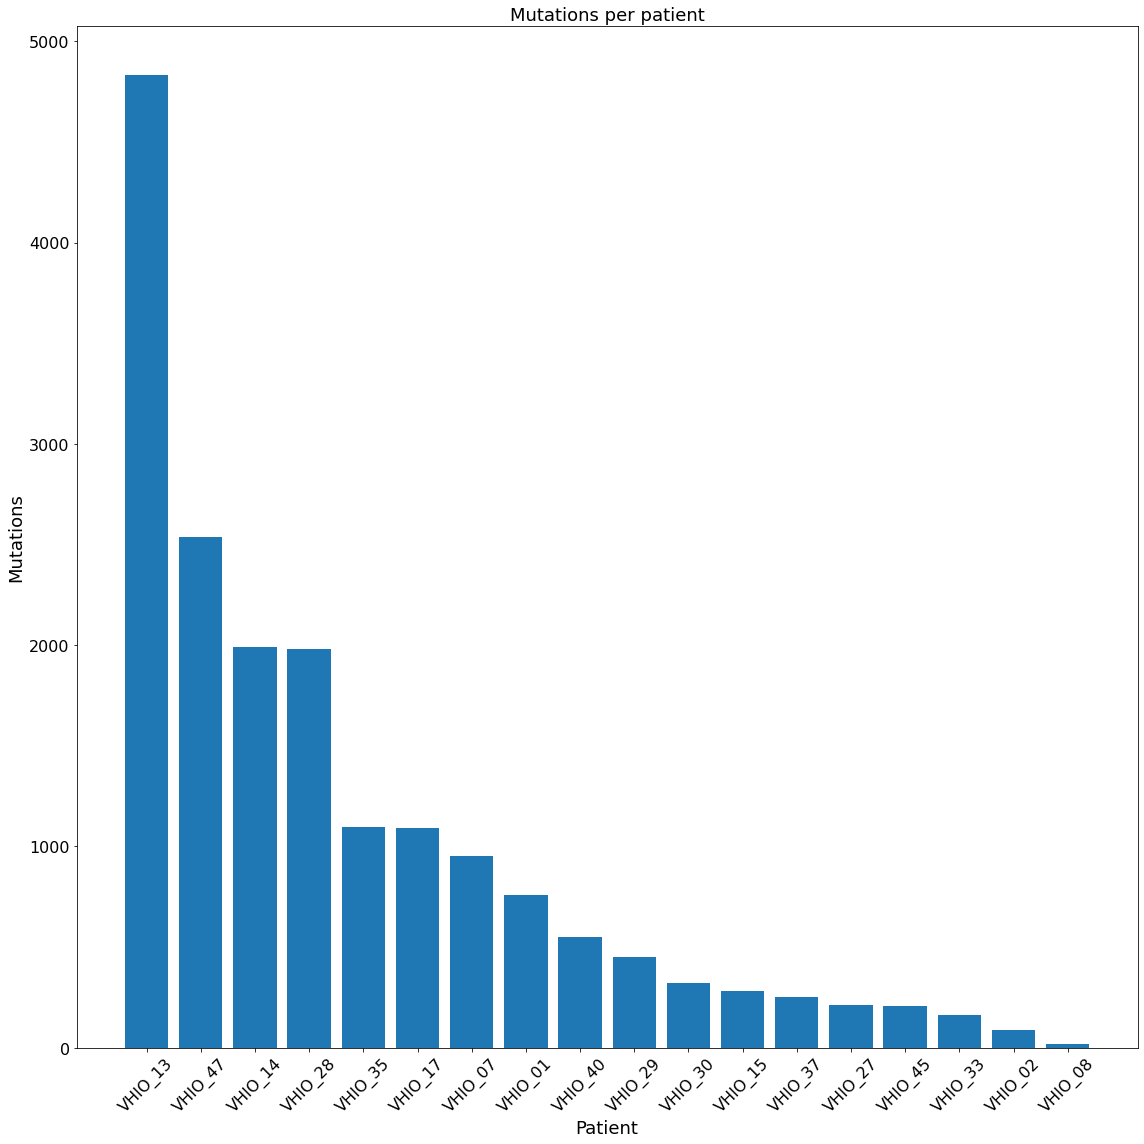

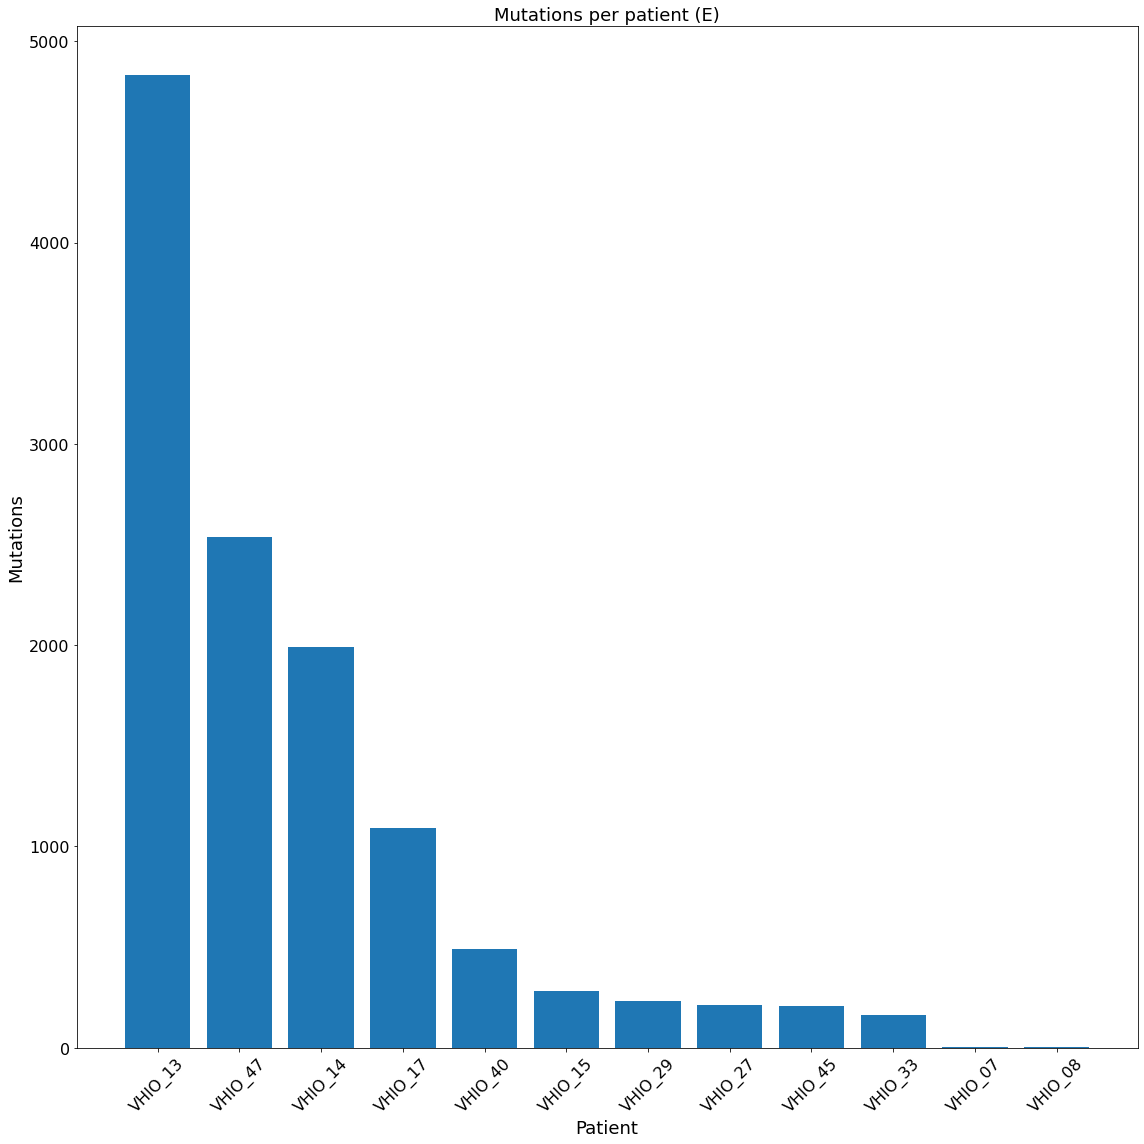

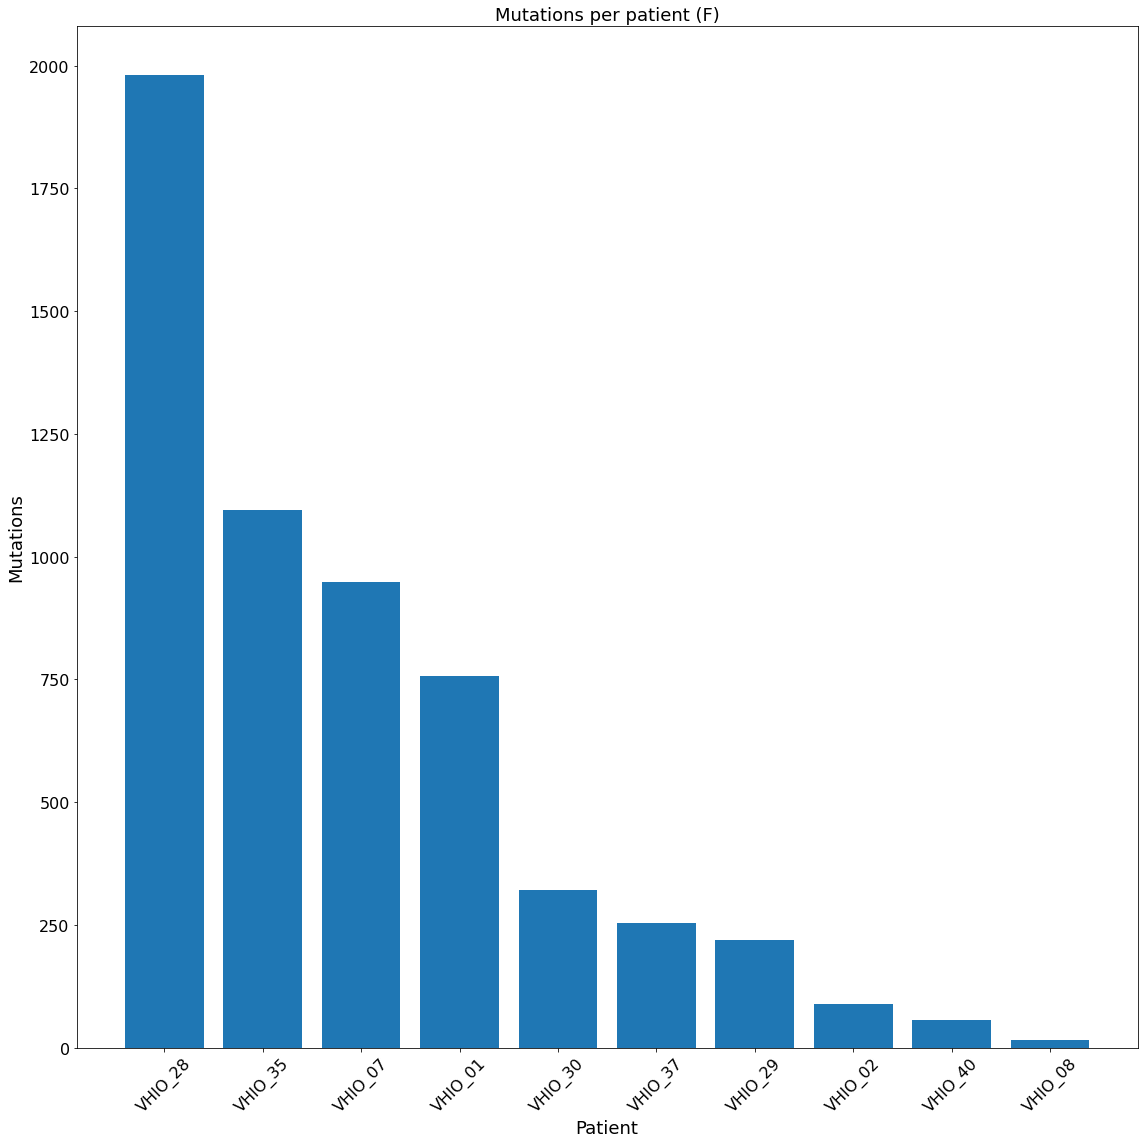

In [167]:
from collections import defaultdict

patients_mutations = defaultdict(int)
patients_mutations_E = defaultdict(int)
patients_mutations_F = defaultdict(int)

for index,row in mutations.iterrows():
    for c,v in row[10:].items():
        if float(v) != 0:
            var2 = meta_filtered.loc[c, 'VAR2']
            patient = c.split('-')[-1]
            patients_mutations[patient] += 1
            if var2 == 'E':
                patients_mutations_E[patient] += 1
            else:
                patients_mutations_F[patient] += 1
    
fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations.keys(), 
                                         patients_mutations.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient.png')

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_E.keys(), 
                                         patients_mutations_E.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient_E.png')

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_F.keys(), 
                                         patients_mutations_F.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient_F.png')

<ipython-input-168-0ecc275ece2d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-168-0ecc275ece2d>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)
<ipython-input-168-0ecc275ece2d>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(k, fontsize=16, rotation=45)


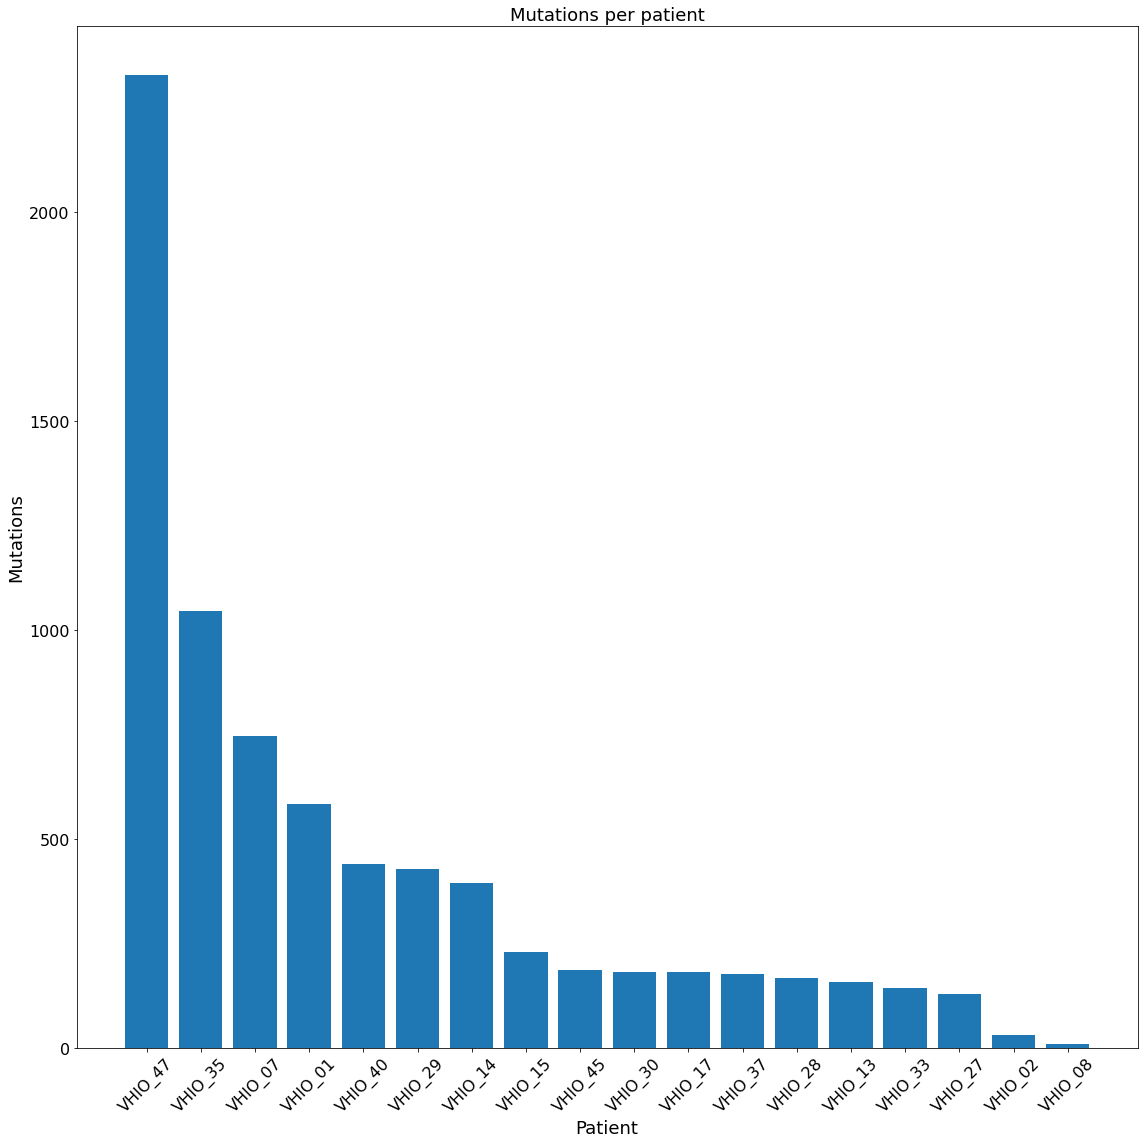

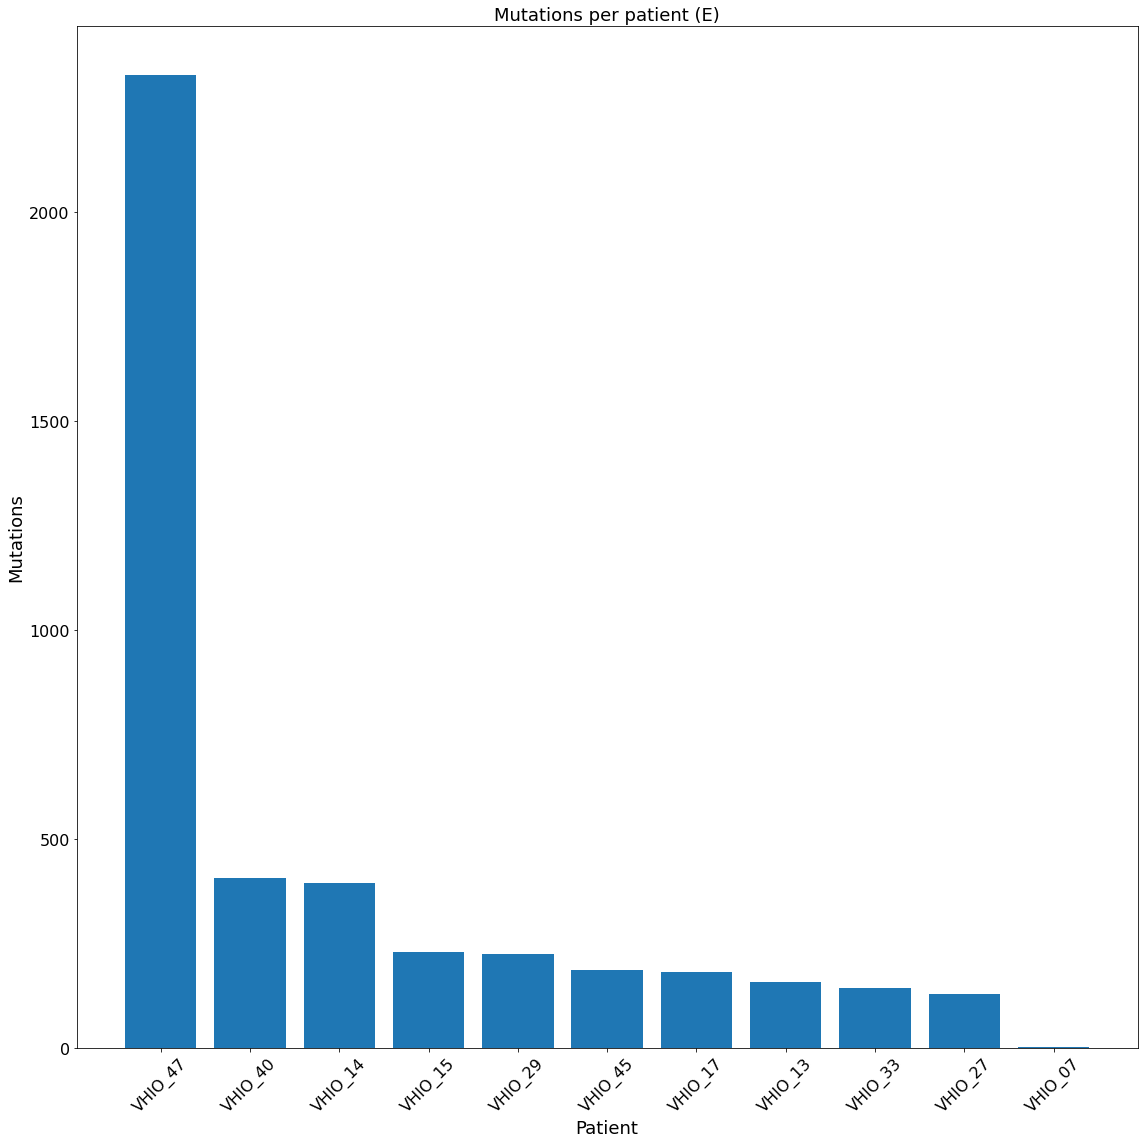

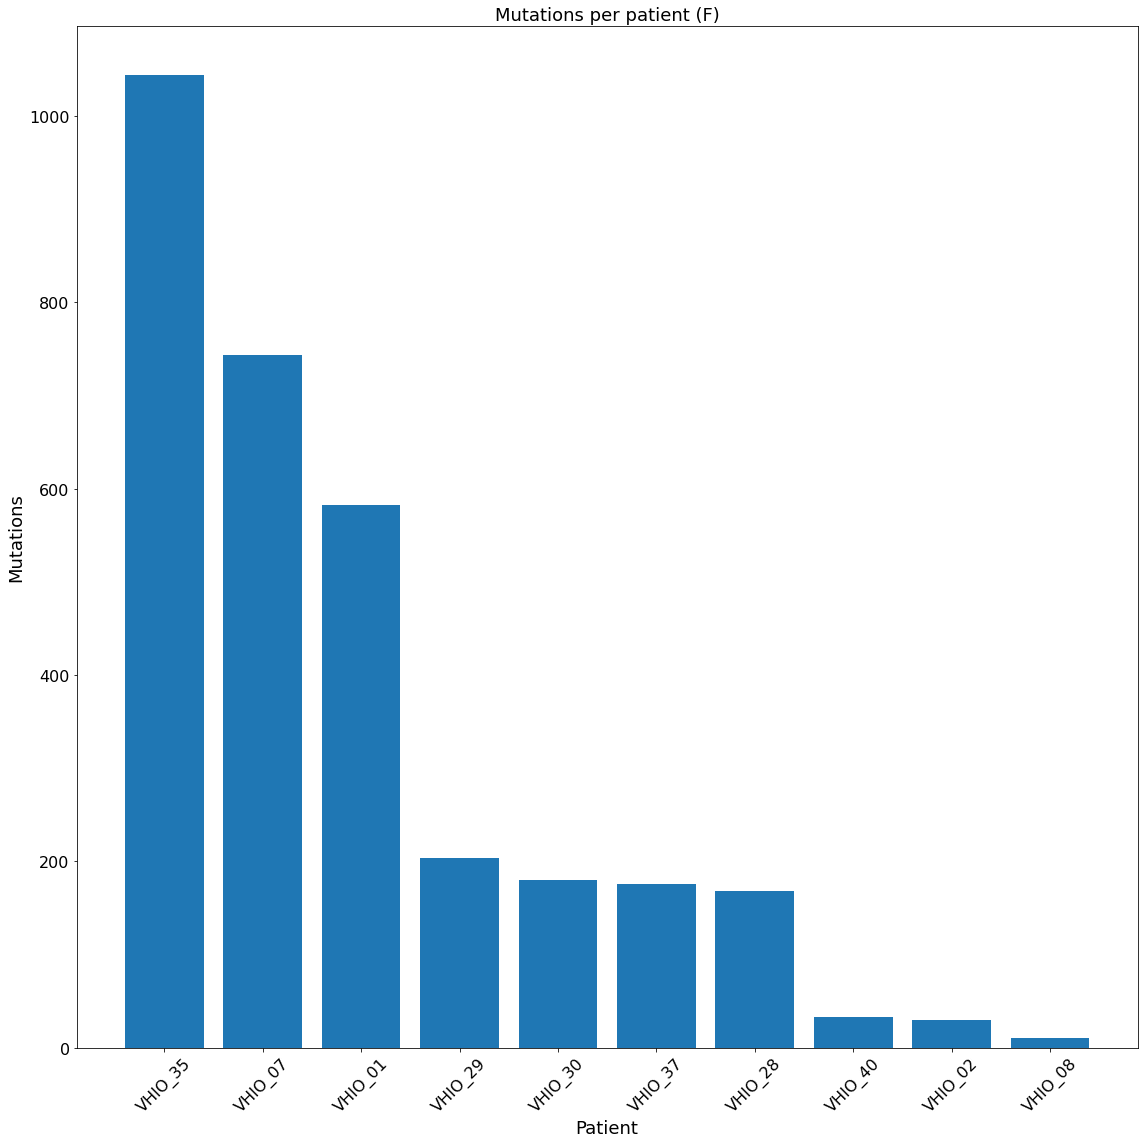

In [168]:
patients_mutations = defaultdict(int)
patients_mutations_E = defaultdict(int)
patients_mutations_F = defaultdict(int)

for index,row in mutations_filtered.iterrows():
    for c,v in row[10:].items():
        if float(v) >= 5:
            var2 = meta_filtered.loc[c, 'VAR2']
            patient = c.split('-')[-1]
            patients_mutations[patient] += 1
            if var2 == 'E':
                patients_mutations_E[patient] += 1
            else:
                patients_mutations_F[patient] += 1
    
fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations.keys(), 
                                         patients_mutations.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient_filtered.png')

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_E.keys(), 
                                         patients_mutations_E.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (E)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient_E_filtered.png')

fig, ax = plt.subplots(figsize=(16,16))

patients_samples = [(x,y) for x,y in zip(patients_mutations_F.keys(), 
                                         patients_mutations_F.values())]
patients_samples_sorted = sorted(patients_samples, key=lambda tup: tup[1], reverse=True)

k = [x[0] for x in patients_samples_sorted]
v = [x[1] for x in patients_samples_sorted]

barlist = ax.bar(k, v)
ax.set_xticklabels(k, fontsize=16, rotation=45)
ax.set_xlabel('Patient', fontsize=18)
ax.set_ylabel('Mutations', fontsize=18)
ax.set_title('Mutations per patient (F)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.tight_layout()
fig.savefig('mutations_per_patient_F_filtered.png')